In [43]:
#线性回归模型
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [21]:
#读取数据
train=pd.read_csv(r'K:\编程\机器学习数据资料\公共自行车使用量预测\train.csv')
test=pd.read_csv(r'K:\编程\机器学习数据资料\公共自行车使用量预测\test.csv')
submit=pd.read_csv(r'K:\编程\机器学习数据资料\公共自行车使用量预测\sample_submit.csv')

In [20]:
train.head()

,city,hour,is_workday,weather,temp_1,temp_2,wind,y
0,0,22,1,2,3.0,0.7,0,15
1,0,10,1,1,21.0,24.9,3,48
2,0,0,1,1,25.3,27.4,0,21
3,0,7,0,1,15.7,16.2,0,11
4,1,10,1,1,21.1,25.0,2,39


In [22]:
train.describe()

,id,city,hour,is_workday,weather,temp_1,temp_2,wind,y
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.499800,11.527500,0.684000,1.42750,15.268190,15.321230,1.248600,50.537400
std,2886.89568,0.500025,6.909777,0.464936,0.63764,9.029152,11.308986,1.095773,47.769645
min,1.00000,0.000000,0.000000,0.000000,1.00000,-7.600000,-15.600000,0.000000,0.000000
25%,2500.75000,0.000000,6.000000,0.000000,1.00000,7.800000,5.800000,0.000000,10.000000
50%,5000.50000,0.000000,12.000000,1.000000,1.00000,15.600000,16.000000,1.000000,39.000000
75%,7500.25000,1.000000,18.000000,1.000000,2.00000,22.600000,24.800000,2.000000,75.000000
max,10000.00000,1.000000,23.000000,1.000000,4.00000,38.600000,46.800000,7.000000,249.000000


In [23]:
#删除id这一列
train.drop('id',axis=1,inplace=True)#inplace表示原数组直接被替换
test.drop('id',axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
city          10000 non-null int64
hour          10000 non-null int64
is_workday    10000 non-null int64
weather       10000 non-null int64
temp_1        10000 non-null float64
temp_2        10000 non-null float64
wind          10000 non-null int64
y             10000 non-null int64
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [35]:
crr=train.corr()


In [28]:
train.corr()

,city,hour,is_workday,weather,temp_1,temp_2,wind,y
city,1.000000,0.004966,0.001449,0.018304,-0.057240,-0.054218,0.010495,-0.165946
hour,0.004966,1.000000,0.016963,-0.028193,0.134849,0.132114,0.132240,0.406489
is_workday,0.001449,0.016963,1.000000,0.040110,0.054786,0.053948,0.001880,0.029477
weather,0.018304,-0.028193,0.040110,1.000000,-0.107515,-0.110732,0.025941,-0.151416
temp_1,-0.057240,0.134849,0.054786,-0.107515,1.000000,0.987357,-0.007017,0.417115
temp_2,-0.054218,0.132114,0.053948,-0.110732,0.987357,1.000000,-0.042559,0.413942
wind,0.010495,0.132240,0.001880,0.025941,-0.007017,-0.042559,1.000000,0.107231
y,-0.165946,0.406489,0.029477,-0.151416,0.417115,0.413942,0.107231,1.000000


In [38]:
crr[np.abs(crr)<0.2]=np.nan
crr

,city,hour,is_workday,weather,temp_1,temp_2,wind,y
city,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.406489
is_workday,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
weather,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
temp_1,NaN,NaN,NaN,NaN,1.000000,0.987357,NaN,0.417115
temp_2,NaN,NaN,NaN,NaN,0.987357,1.000000,NaN,0.413942
wind,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
y,NaN,0.406489,NaN,NaN,0.417115,0.413942,NaN,1.000000


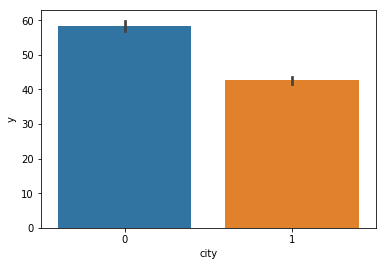

In [44]:
#探索性数据分析
sns.barplot(data=train,x='city',y='y')

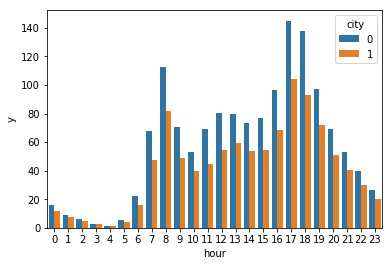

In [45]:
base_color=sns.color_palette()[0]
sns.barplot(data=train ,x='hour',y='y'
            ,hue='city',ci=None)

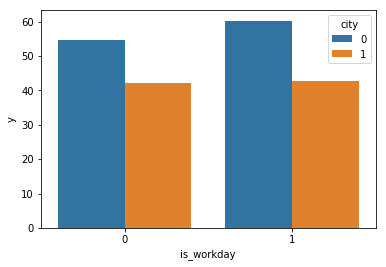

In [47]:
sns.barplot(data=train,x='is_workday',y='y',hue='city',ci=None)

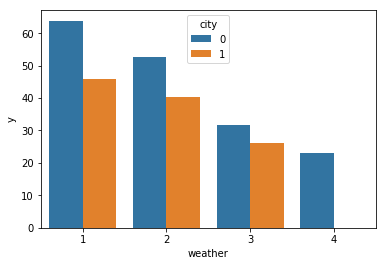

In [49]:
sns.barplot(data=train,x='weather',y='y',hue='city',ci=None)

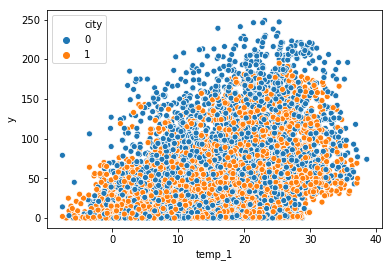

In [50]:
sns.scatterplot(data=train,x='temp_1',y='y',hue='city',ci=None)#温度与使用量成线性关系

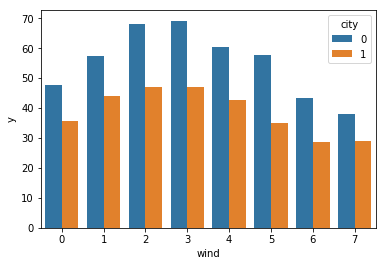

In [51]:
sns.barplot(data=train,x='wind',y='y',hue='city',ci=None)

In [11]:
#pop方法可以将所选列从原数据块中弹出，原数据块不再保留该列。
#取出训练集中的y
y_train=train.pop('y')

In [12]:
#建立回归模型
reg=LinearRegression()
reg.fit(train,y_train)
y_pred=reg.predict(test)

In [14]:
y_pred

array([ 40.64259768,  92.29653354,  86.62355543, ..., 103.65561083,
        85.23691045,  56.03908567])

In [15]:
#如果预测的y为负数则让它们取0
#map函数返回一个map类型的变量
y_pred=list(map(lambda x:x if x>=0 else 0,y_pred))#if 条件为真的话就返回lambda表达式为假的话就返回0

In [17]:
submit['y']=y_pred
submit.to_csv(r"K:\编程\机器学习数据资料\公共自行车使用量预测\MyPredicition.csv",index=False)